In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")
import math

# 1 - Business Problem 

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


# 2 - Data collection and description

In [156]:
df = pd.read_csv("D:Harsha/Data sciences/Assignments/Assignment_5_ Multi Linear Regression/ToyotaCorolla.csv",encoding='latin1')

In [157]:
df = TC

In [158]:
TC.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [159]:
TC1 = TC [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [160]:
TC1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [161]:
TC1.shape

(1436, 9)

In [162]:
TC1.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [163]:
TC1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [164]:
TC1.isnull()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False


In [165]:
TC1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# 3 - Data visualization

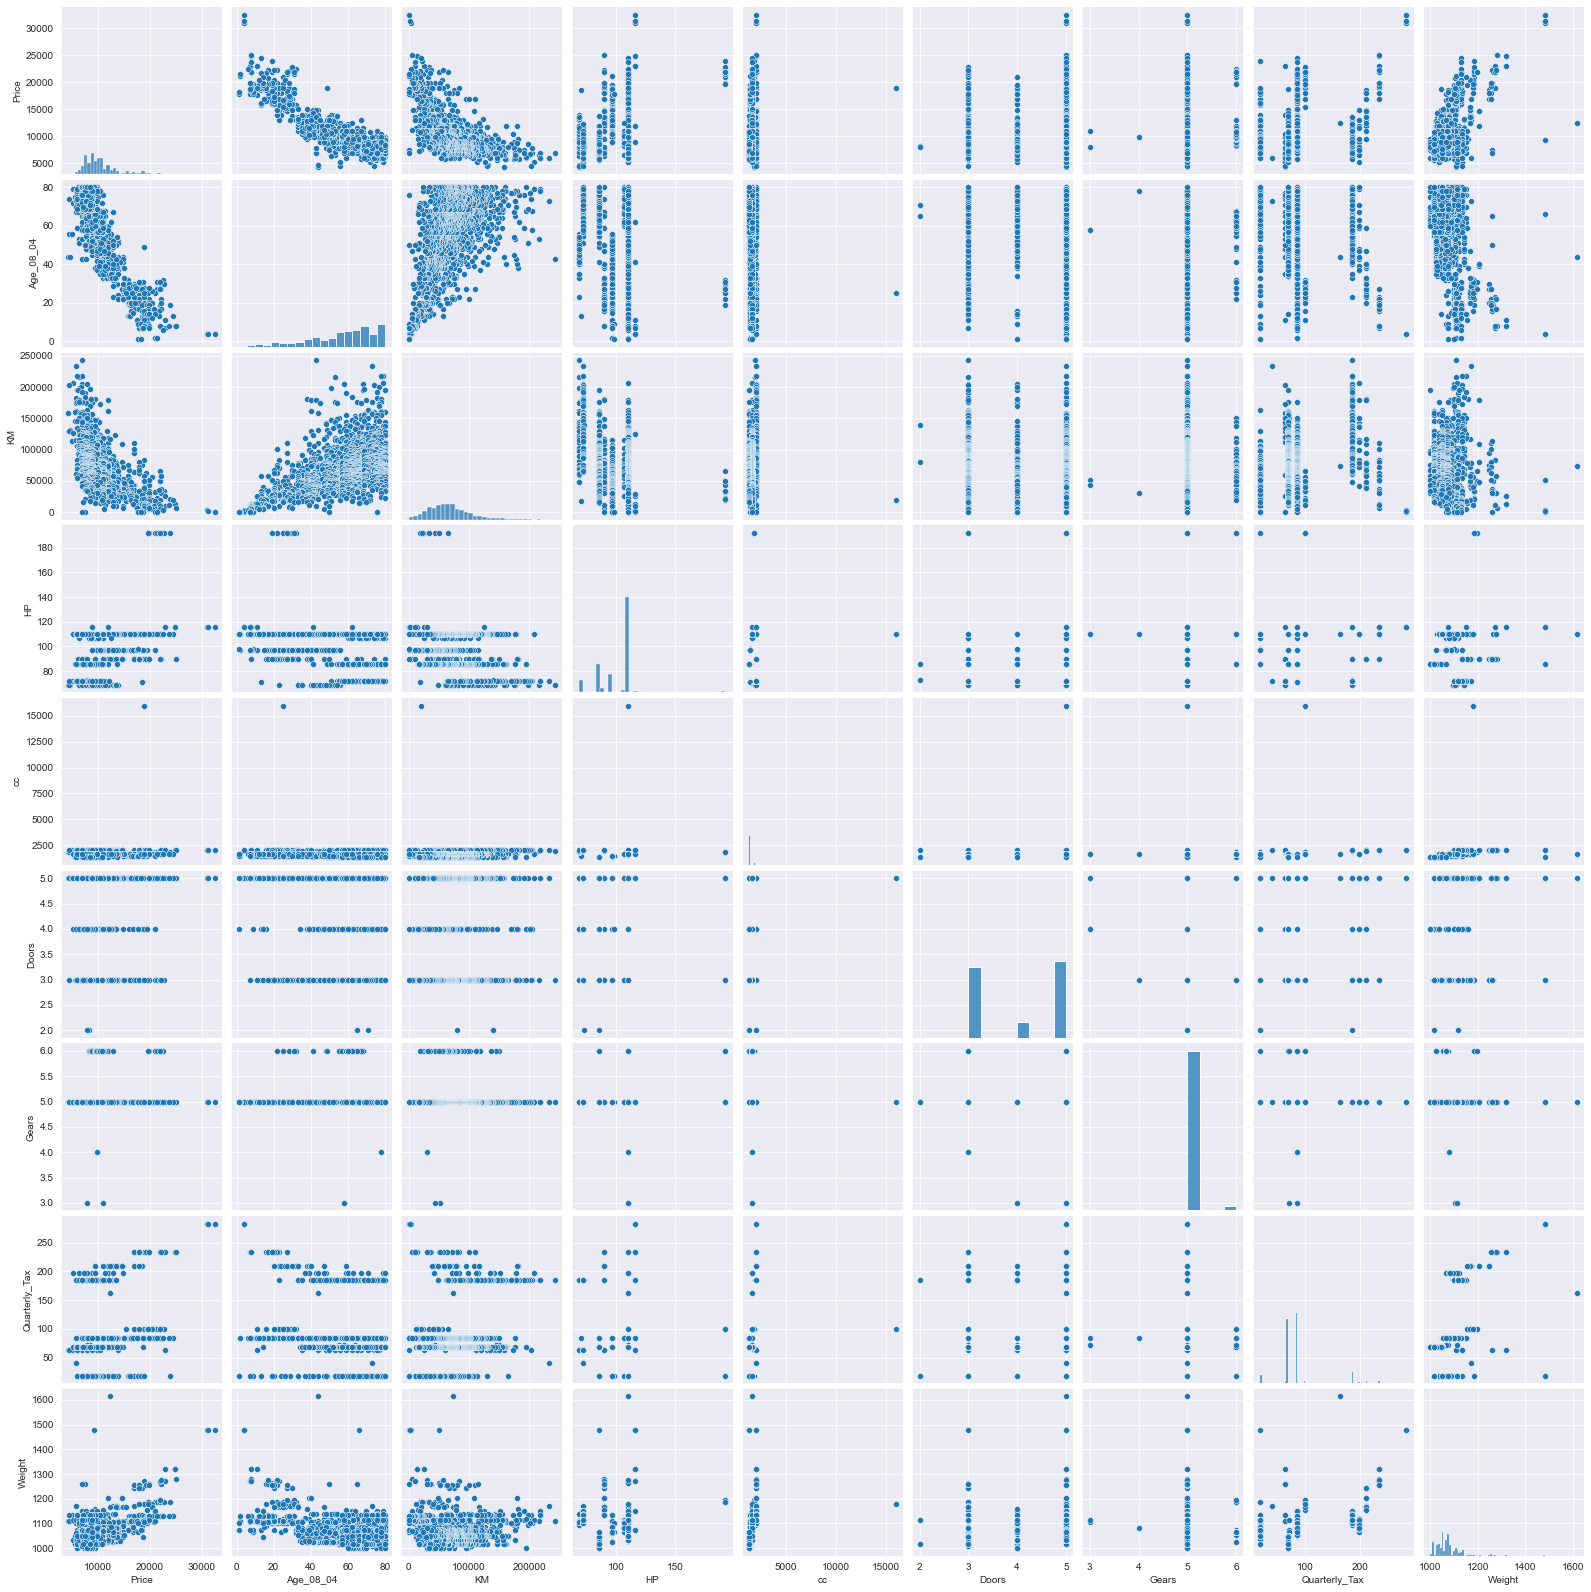

In [166]:
sns.set_style(style='darkgrid')
sns.pairplot(TC1)

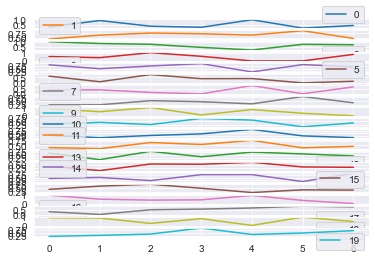

In [167]:
TC1 = pd.DataFrame(np.random.rand(7,20))

TC1.plot(subplots=True)

plt.tight_layout()
plt.show()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

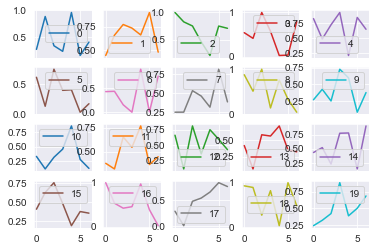

In [168]:
TC1.plot(subplots=True, layout=(4,5))

# 4 - Correlation Matrix

In [169]:
corrMatrix = TC1.corr()

<AxesSubplot:>

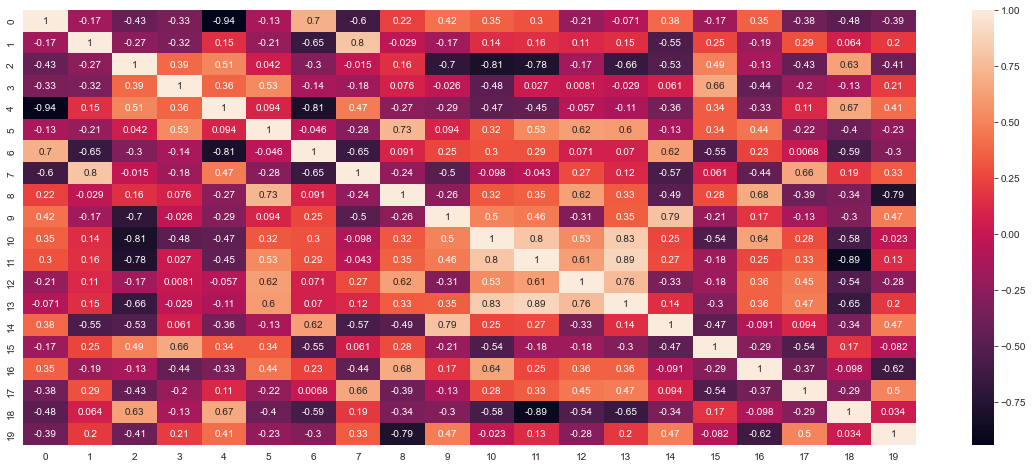

In [170]:
plt.subplots(figsize=(20,8))
sns.heatmap(corrMatrix, annot=True)

# 5 - Regression Model

In [177]:
X = pd.DataFrame(TC,columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
Y = pd.DataFrame(TC,columns=['Price'])

In [178]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [176]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        12:59:20   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4510      2.445    -51.303      0.000    -130.248    -120.654
KM               -0.0205      0.001    -16.305      0.000      -0.023      -0.018
HP               33.4737      2.796     11.973      0.000      27.990      38.958
cc               -0.1032      0.090     -1.141      0.254      -0.281       0.074
Doors            -7.2494     40.184     -0.180      0.857     -86.075      71.576
Gears            78.3780    148.258      0.529      0.597    -212.449     369.205
Quarterly_Tax     5.8258      1.227      4.748      0.000       3.419       8.233
Weight           14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R sq and p value of the model is good and the model can be accepted. However as you can see not all variables have acceptable p value. Thus we have multicollinearity issue in our data Frame

# 6 - Solving Multicollinearity

### Finding Cook's Distance

In [212]:
infl = model.get_influence()
(c, _) = infl.cooks_distance
c

array([8.26509102e-03, 4.60103149e-03, 6.29321906e-03, ...,
       7.00856384e-09, 8.27315188e-04, 7.34529482e-03])

In [213]:
summary_TC1 = infl.summary_frame()
summary_TC1

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.032494,0.063321,0.005645,-0.013190,0.096638,-0.006730,-0.153999,-0.007432,8.265091e-03,-2.532689,0.010203,-0.257140,-2.537507,-0.257629
1,0.051561,0.001322,-0.004736,-0.006577,0.075607,-0.003323,-0.104323,-0.006422,4.601031e-03,-1.950029,0.009587,-0.191855,-1.951947,-0.192043
2,0.017976,0.067628,0.006850,-0.012214,0.083071,-0.004929,-0.136944,-0.006841,6.293219e-03,-2.184736,0.010438,-0.224379,-2.187630,-0.224676
3,0.009106,0.031312,0.002228,-0.005975,0.044148,-0.000969,-0.071375,-0.004346,1.696314e-03,-1.156628,0.010042,-0.116493,-1.156765,-0.116506
4,-0.009058,0.075063,0.007689,-0.010114,0.073385,0.006917,-0.121298,-0.014239,4.724195e-03,-1.874408,0.010642,-0.194406,-1.876061,-0.194577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.040884,0.056487,0.035146,0.005274,0.019507,-0.008393,-0.003733,-0.008957,6.990354e-04,-0.983300,0.005751,-0.074782,-0.983288,-0.074781
1432,0.087678,-0.115761,-0.064678,-0.007881,-0.032947,0.022040,0.015692,0.007754,2.764902e-03,1.863963,0.006326,0.148725,1.865581,0.148854
1433,-0.000136,0.000186,0.000104,0.000012,0.000052,-0.000037,-0.000025,-0.000011,7.008564e-09,-0.002953,0.006388,-0.000237,-0.002952,-0.000237
1434,-0.045654,0.063630,0.036068,0.004215,0.018043,-0.013426,-0.008345,-0.003683,8.273152e-04,-1.027039,0.006235,-0.081354,-1.027059,-0.081356


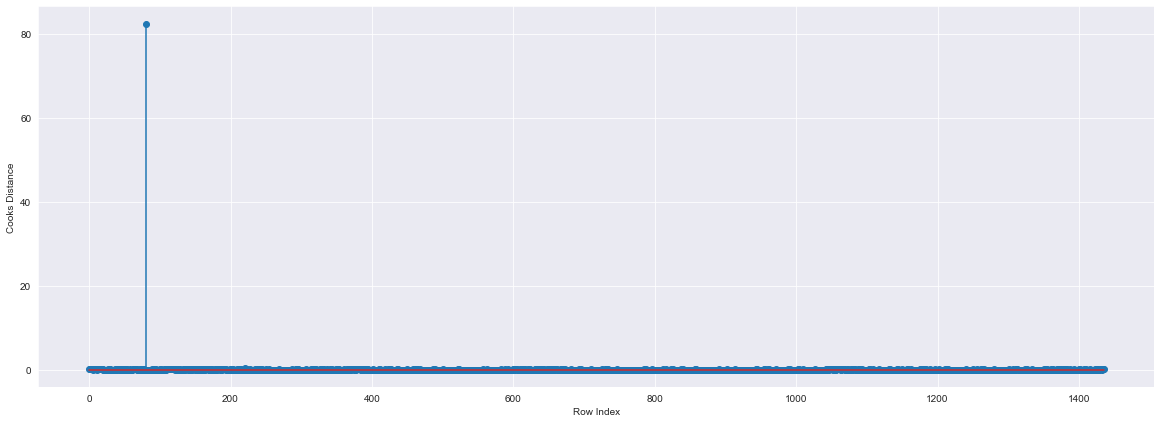

In [215]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(summary_TC1)),np.round(c,3), use_line_collection=True,orientation='vertical')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [216]:
summary_TC1.sort_values('cooks_d', ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.289686,-2.363023e+00,-2.781734,2.615263e+01,0.645518,0.905398,-4.283020,-3.611394,8.241996e+01,7.678996,0.917911,25.678000,7.839881,26.215988
221,-0.255051,-2.607849e-02,0.174427,4.179288e-01,0.553762,1.572311,0.558929,-1.690024,3.719885e-01,-6.154172,0.072850,-1.725082,-6.235259,-1.747812
960,-0.208597,3.740370e-02,0.443719,1.977218e-01,0.539659,0.995730,0.788653,-1.264022,2.083232e-01,-4.104460,0.090022,-1.290963,-4.127441,-1.298191
109,0.104572,-2.934313e-01,0.114571,-1.902240e-01,-0.220145,-0.606577,0.332191,0.558699,1.226360e-01,4.952891,0.038456,0.990499,4.994239,0.998768
601,-0.213100,3.186680e-01,0.385097,-1.107466e-01,0.404397,0.551158,0.429648,-0.747923,9.677099e-02,-5.594639,0.024137,-0.879868,-5.654999,-0.889361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,-0.000069,-5.512316e-05,0.000142,6.568459e-05,0.000134,-0.000053,0.000083,-0.000039,1.558972e-08,-0.006835,0.002662,-0.000353,-0.006833,-0.000353
482,-0.000005,2.712126e-08,-0.000085,2.916558e-07,-0.000162,0.000013,-0.000026,0.000046,8.250836e-09,-0.006371,0.001623,-0.000257,-0.006369,-0.000257
1433,-0.000136,1.856487e-04,0.000104,1.209905e-05,0.000052,-0.000037,-0.000025,-0.000011,7.008564e-09,-0.002953,0.006388,-0.000237,-0.002952,-0.000237
397,-0.000015,4.001993e-05,0.000028,1.344847e-06,-0.000098,-0.000034,0.000125,0.000025,6.628524e-09,0.002440,0.008830,0.000230,0.002439,0.000230


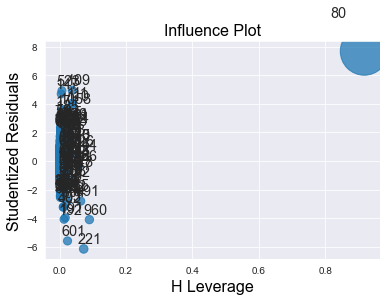

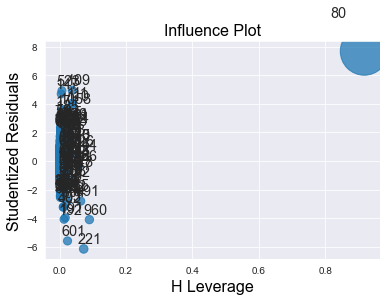

In [182]:
infl.plot_influence()

eval_env: 1


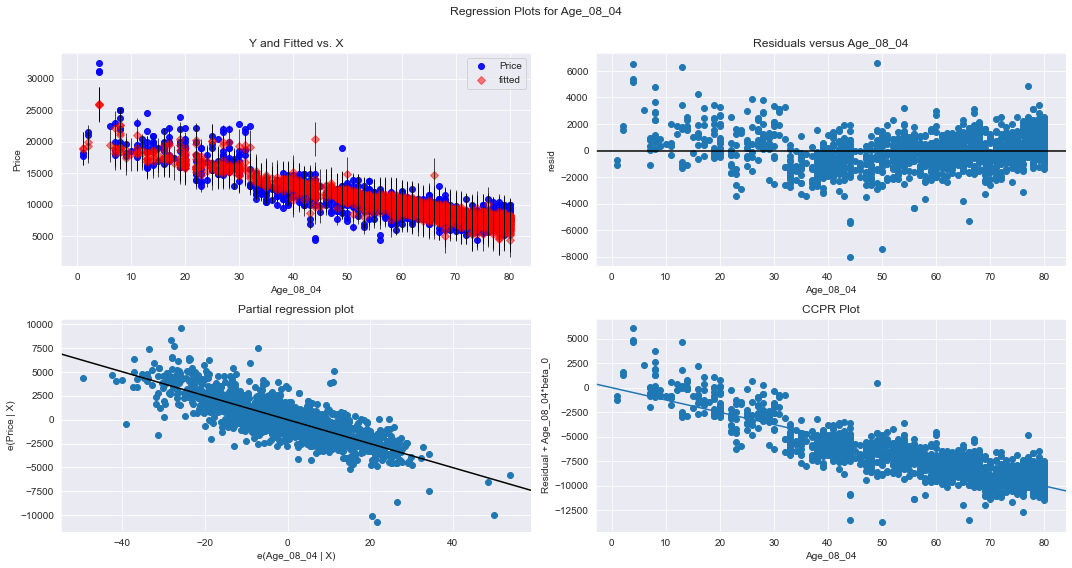

In [183]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


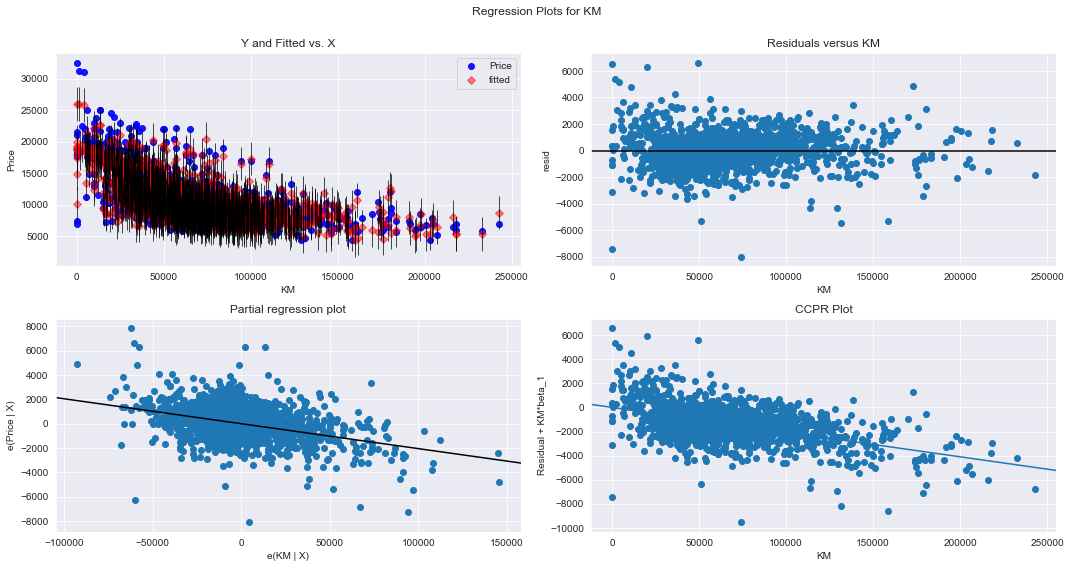

In [184]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


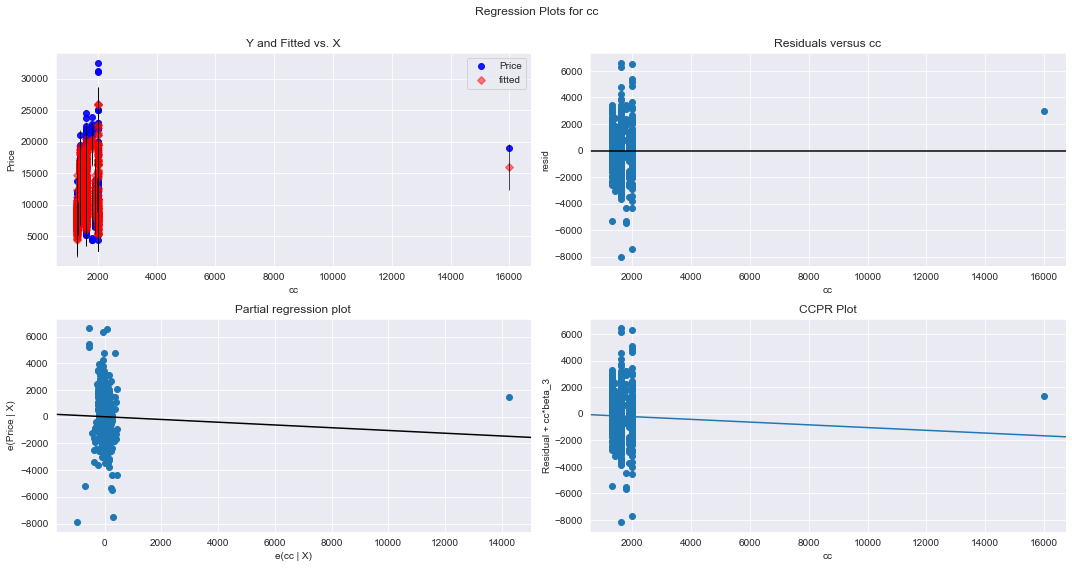

In [185]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()


eval_env: 1


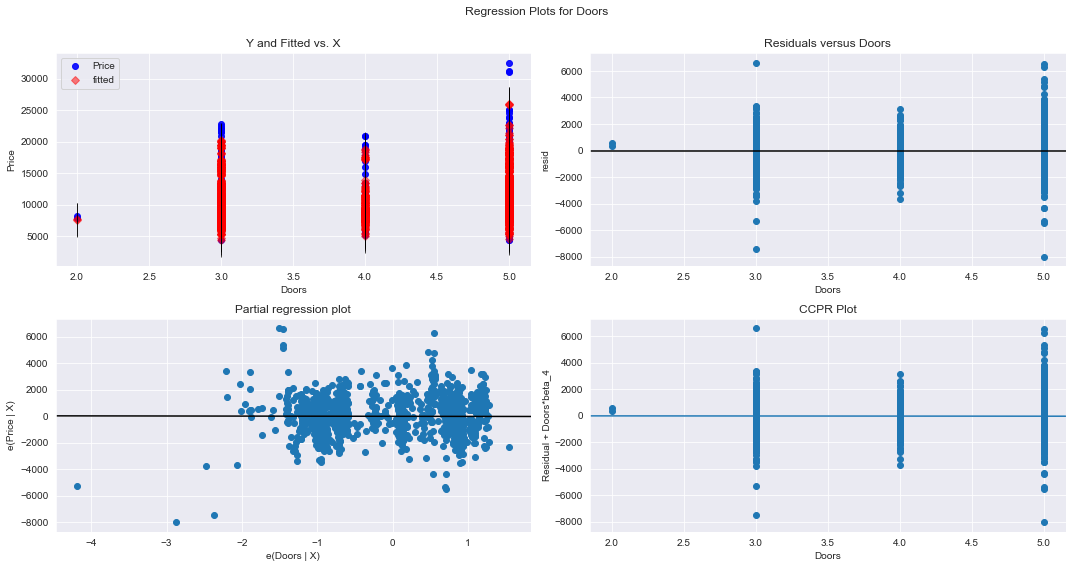

In [186]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()


eval_env: 1


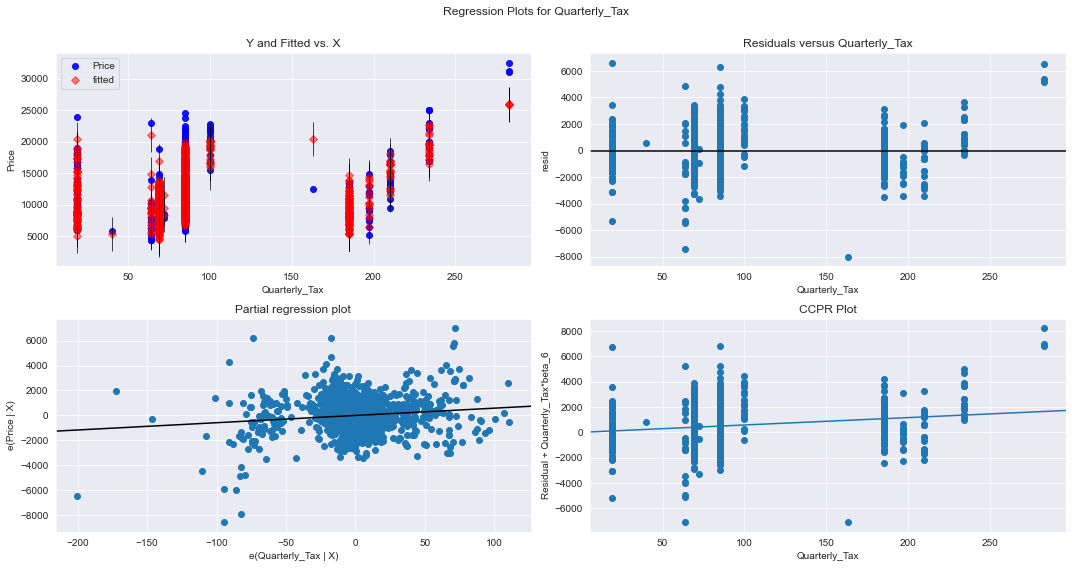

In [187]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

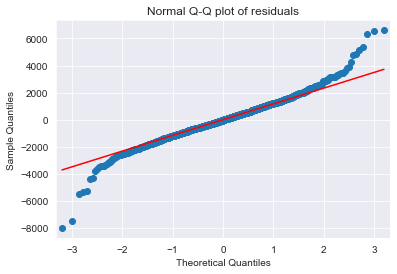

In [188]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [189]:
(np.argmax(c),np.max(c))

(80, 82.41996172645916)

#### Index 80 has highest Cook's Distance

Thus it will be wise to drop this row from the data set

### Finding Variance Inflation Factor (VIF)

In [190]:
vif = pd.DataFrame()

In [191]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [192]:
vif["features"] = X.columns

In [193]:
vif.round(1)

,VIF Factor,features
0,16.4,Age_08_04
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.6,Gears
6,11.0,Quarterly_Tax
7,543.1,Weight


#### As expected, Geras and Weight have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables to improve model and try to solve multicolinearity.

In [194]:
X1 = pd.DataFrame(TC,columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax'])
Y1 = pd.DataFrame(TC,columns=['Price'])

In [195]:
X1.isnull().sum()


Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
dtype: int64

In [196]:
X1

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax
0,23,46986,90,2000,3,5,210
1,23,72937,90,2000,3,5,210
2,24,41711,90,2000,3,5,210
3,26,48000,90,2000,3,5,210
4,30,38500,90,2000,3,5,210
...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69
1432,72,19000,86,1300,3,5,69
1433,71,17016,86,1300,3,5,69
1434,70,16916,86,1300,3,5,69


In [197]:
new_model = sm.OLS(Y1,X1).fit()
new_predictions = new_model.predict(X1)

In [198]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:01:13   Log-Likelihood:                         -12532.
No. Observations:                1436   AIC:                                  2.508e+04
Df Residuals:                    1429   BIC:                                  2.512e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0628      2.682    -49.245      0.000    -137.323    -126.802
KM               -0.0208      0.001    -14.947      0.000      -0.024      -0.018
HP               44.4711      3.027     14.692      0.000      38.533      50.409
cc                0.1805      0.099      1.827      0.068      -0.013       0.374
Doors           272.5298     41.159      6.621      0.000     191.791     353.269
Gears          2417.9083     81.331     29.729      0.000    2258.368    2577.449
Quarterly_Tax    17.0169      1.177     14.462      0.000      14.709      19.325
==============================================================================
Omnibus:                      184.883   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.580
Skew:                           0.640   Prob(JB):                    1.89e-127
Kurtosis:                       5.849   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  As you can see, once we remove "Weight" from input variables and run the model again, all the variables are significant.

# 7 - Final Model

In [199]:
TC3 = TC.drop(TC.index[80])

In [200]:
TC3.shape

(1435, 38)

In [201]:
new_X = pd.DataFrame(TC3,columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax'])
new_Y = pd.DataFrame(TC3,columns=['Price'])

In [202]:
final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [203]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:01:19   Log-Likelihood:                         -12524.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.510e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0191      2.684    -49.196      0.000    -137.283    -126.755
KM               -0.0210      0.001    -14.581      0.000      -0.024      -0.018
HP               43.7530      3.287     13.310      0.000      37.304      50.202
cc                0.3468      0.313      1.109      0.268      -0.267       0.960
Doors           270.3889     41.346      6.540      0.000     189.284     351.494
Gears          2394.0486     91.807     26.077      0.000    2213.957    2574.140
Quarterly_Tax    16.4778      1.520     10.843      0.000      13.497      19.459
==============================================================================
Omnibus:                      183.937   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.178
Skew:                           0.636   Prob(JB):                    3.82e-127
Kurtosis:                       5.849   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 8 - Output Interpretation

1 - p-value < 0.01. Thus the model is accepted

2 - coefficient == -132.01 . Thus if the value of x increased by 1, the predicted value of Price will decrease by 132.01